# Predict students' dropout and academic success

Jacopo Bonanno</br>
Luigi Vecchioli

## Abstract

This work is aimed at the description of the dataset "Predict students' dropout and academic success" and at the creation of a model to predict the possiblity of dropout of a student.
The features of the students can be classified in: parent's income and occupation, curricular units, personal data (nationality, marital status, age, gender) and other financial information (debtor, scholarship holder, tuition fees up to date).
Going deeper in our analysis, we started by identifying the precence of missing values and eventual correlations among attributes (go to the Data Analysis section to see the results), then we plotted the attributes with the pairplot and in the end we clusterized the data both with hierarchical and non hierarchical algorithms.
<br/> In the Advanced Analysis section we finally implemented the LDA to train and test the model, and, (at least in our opinion 🙂) we achieved satisfactory results.

# Introduction

### Data

The dataset is organized in 4425 rows or students and 37 columns or attributes, but, as we will see later, not all the attributes have been used for the analysis since the dataset would have been too heavy and the code would have taken too much time to execute. There are no missing values.
<br/> During our analysis, examining the correlation matrix, we found out that the attributes were not correlated among themselves except for three cases that we hilighted in the Correlation Matrix section.
<br/>Then, in order to find out other possible features of the attributes we used the pairplot that showed that many variables were cathegorical (it means that, for the Mother's and Father's Occupation for instance, the jobs were classified from 1 to 200, and this had some consequences on the method we chosed for the predictive model, since the first choice was the logistic but it doesn't fit well with this type of variables) and that there almost all the variables are independent (since there are no growing or decreasing patterns, except for the already mentioned case of Mother's and Father's Occupation).

### Methodology:
Algorithms used for analysis
K-means, PCA, Ward, LDA

* **K-Means:** Method done in class, being a hierarchical method we had to enter the number k of groups, to do this we chose the silhouette method at various k from 2 to 10 and then identified 3 as the optimal number of groups. The graphical representation on the two-dimensional plane was obtained by the factorial map (new plane obtained using the first principal component in the abscissae and the second principal component in the ordinates as axes) obtained in turn from the PCA
* **PCA:** matrix size reduction method that actually identifies several principal components, we chose the first ones based on the (highest) variance
* **Ward:** to accompany a hierarchical clustering to the non-hierarchical K-Means clustering (both are clustering methods but we cannot be sure which one is the best, so to check the robustness of the results we can do a comparison of the two methods), the Ward was chosen from the single link, complete, mean and centroid method, as it turns out to be the one that is more compelte as we preferred its approach based on minimizing the variance within and maximizing the variance between, and this guarantees better results (just look at the other methods to understand)since it manages to find better associations between variables
* **LDA:** discriminant analysis as a machine learning method was chosen because it is a classification method, i.e., class prediction (dropout: 1, other: 0), instead of a regression algorithm such as linear which is used instead to predict in the continuum.
This method is based on identifying a direction (eigenvector) on which, once all our data are projected, it is easy to identify a threshold value that discriminates one class from another (if the projection of the data is to the left or right of the value, the result becomes 1 or 0). The optimal direction is identified by going to minimize the variance within and maximize the variance between
* **N.B.:** The first algorithm chosen for prediction was regression
logistic, later abandoned because of the many categorical variables in the dataset, which, when transformed into dummies, would have made the model much heavier.

The final purpose of our analysis is the creation of a model which is able to understand whether a student dropout or not

All the steps before the "Advanced analysis" have been made to better understand how the dataset is composed and other eventual features of the data

## Data Analysis

### Preliminary investigation
*   **Describe Method:** We used the describe method to have an overview of the dataset
*   **Missing Values:** We checked for any missing values, without finding them
*   **Correlation Matrix:** We used the correlation matrix to check any correlation among the variables selected in the new dataset called ds_clean, so the simplified dataset we created without the variables we were not interested in
*   **Pairplot:** We used the pairplot to plot all variables with each other
*   **Clusters:**
>* K-Means
>* Hierarchical Cluster: Wald
>* Hierarchical Cluster: Complete
>* Hierarchical Cluster: Single
>* Hierarchical Cluster: Centroid


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150 #improves the quality of the images

In [ ]:
#https://drive.google.com/file/d/1jvqnU4-B92sUPGGaoFWLkSnmyrhPfDwD/view?usp=share_link
! gdown --id 1jvqnU4-B92sUPGGaoFWLkSnmyrhPfDwD

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jvqnU4-B92sUPGGaoFWLkSnmyrhPfDwD
To: /content/data.csv
100% 533k/533k [00:00<00:00, 106MB/s]


In [ ]:
# Reading the dataset
ds = pd.read_csv("data.csv", sep=";")
ds.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Now we are going to simplify the dataset removing some "non interesting" variables chosed by us, so we created the new dataset called "ds_clean", which contains only the relevant variables (relevance was chosen subjectively in order to lighten the dataset)

In [ ]:
# Now we want to delete the columns we are not interested in, because we think, subjectively,
# that some of them are not relevant to our analysis

ds_clean = ds[['Marital status',
              # 'Application mode',
              'Application order', 'Course',
              'Daytime/evening attendance\t',
              'Previous qualification',
              # 'Previous qualification (grade)',
              'Nacionality',
              "Mother's qualification", "Father's qualification",
              "Mother's occupation", "Father's occupation", 'Admission grade',
              # 'Displaced',
              'Educational special needs',
              'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
              'Age at enrollment',
              # 'International',
              # 'Curricular units 1st sem (credited)',
              # 'Curricular units 1st sem (enrolled)',
              # 'Curricular units 1st sem (evaluations)',
              # 'Curricular units 1st sem (approved)',
              # 'Curricular units 1st sem (grade)',
              'Curricular units 1st sem (without evaluations)',
              # 'Curricular units 2nd sem (credited)',
              # 'Curricular units 2nd sem (enrolled)',
              # 'Curricular units 2nd sem (evaluations)',
              # 'Curricular units 2nd sem (approved)',
              # 'Curricular units 2nd sem (grade)',
              # 'Curricular units 2nd sem (without evaluations)',
              # 'Unemployment rate', 'Inflation rate', 'GDP',
              'Target']]
# in the end we changed the variable Target {1: "Dropout"; 0: "Other"}
# this will be useful for the LDA since we changed Dropout, graduated and enrolled in dropout and non dropout
ds_clean['Target'] = (ds_clean['Target'] == 'Dropout').astype(int)
ds_clean.head()

<ipython-input-5-3cce9dd243dd>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_clean['Target'] = (ds_clean['Target'] == 'Dropout').astype(int)


,Marital status,Application order,Course,Daytime/evening attendance\t,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (without evaluations),Target
0,1,5,171,1,1,1,19,12,5,9,127.3,0,0,1,1,0,20,0,1
1,1,1,9254,1,1,1,1,3,3,3,142.5,0,0,0,1,0,19,0,0
2,1,5,9070,1,1,1,37,37,9,9,124.8,0,0,0,1,0,19,0,1
3,1,2,9773,1,1,1,38,37,5,3,119.6,0,0,1,0,0,20,0,0
4,2,1,8014,0,1,1,37,38,9,9,141.5,0,0,1,0,0,45,0,0


### Describe Method

with the **describe method**, we can make an idea of how the single variables are composed:
*   Some of them are boolean, like Target (that we modified previously) and debtor or educational special needs
*   All the variables are numerical, there are no qualitative variables in the dataset
*   others are categorical like Father's qualification and Mother's qualification, the legend of the occupations and qualifications can be found in the dataset documentation provided before downloading the file

In [ ]:
ds_clean.describe()

,Marital status,Application order,Course,Daytime/evening attendance\t,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (without evaluations),Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,1.727848,8856.642631,0.890823,4.577758,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.137658,0.321203
std,0.605747,1.313793,2063.566416,0.311897,10.216592,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.690880,0.466991
min,1.000000,0.000000,33.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000
50%,1.000000,1.000000,9238.000000,1.000000,1.000000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000
75%,1.000000,2.000000,9556.000000,1.000000,1.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,1.000000
max,6.000000,9.000000,9991.000000,1.000000,43.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,12.000000,1.000000


### Heatmap

Checking for missing values with the **heatmap** method provided by the seaborn package, we can state that there are no missing values

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


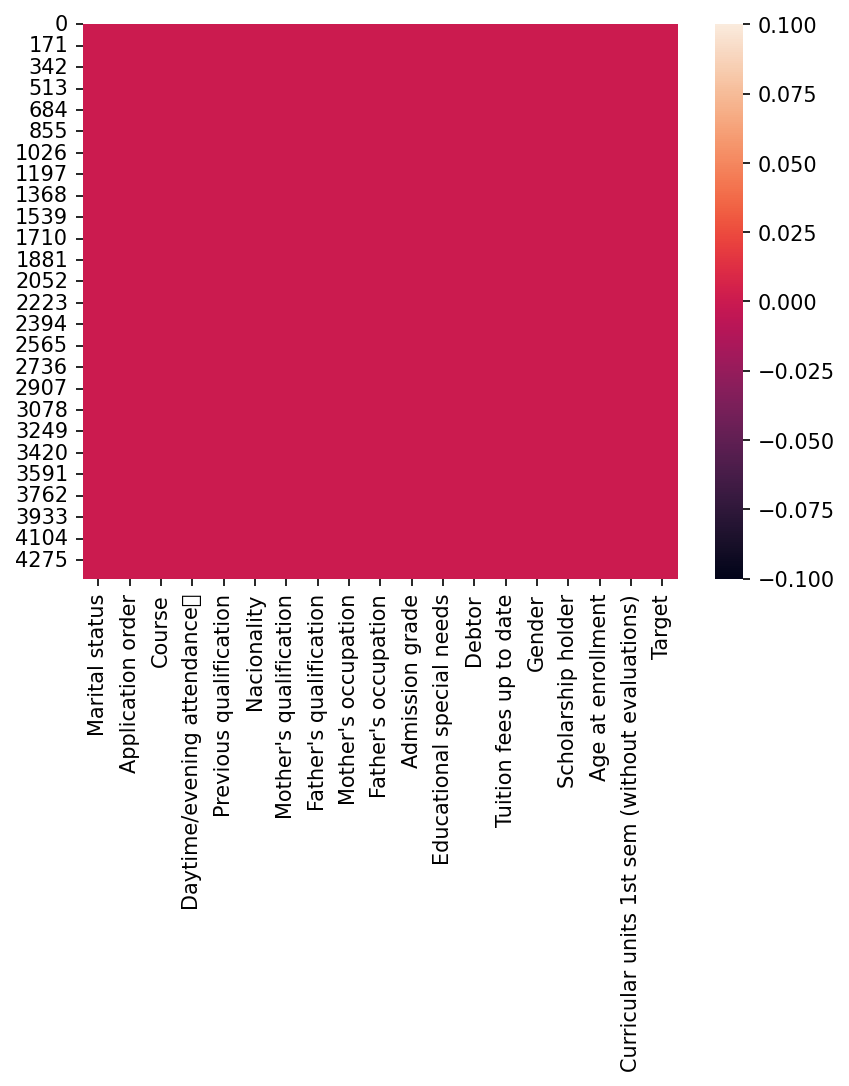

In [ ]:
sns.heatmap(ds_clean.isna())

### Correlation Matrix

**Correlation matrix**: with the seaborn package we can create the correlation matrix. This tool allows us to understand if dome variables are related (both positively or negatively). As a result we can state that the variables are almost independent from each other, that's good because in the opposite case we would have had redundant information.
The only interesting results in this matrix are:
*   Positive correlation between Mother's and Father's Occupation: meaning that parents tend to have similar occupation
*   Light negative relation between the Age of enrollement and the Daytime/evening attendance: so, as age increases, the number of people attending evening courses increases
*   Positive correlation between Tuition fees up to date and Debtor: paradoxically, debtors are more punctual in paying tuition fees (it makes sense if you think about it)

<Axes: >

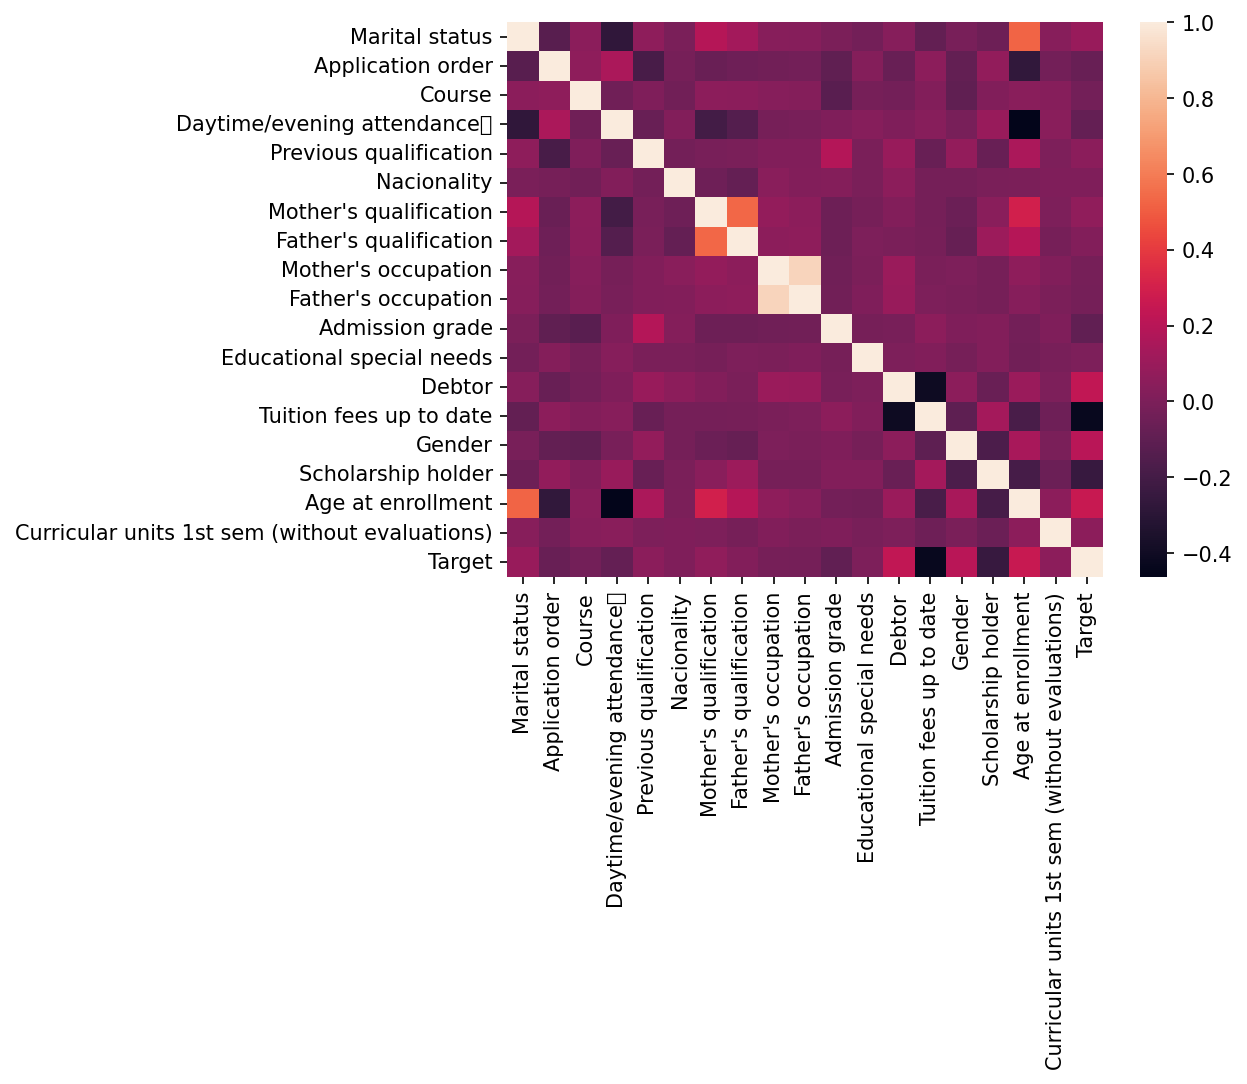

In [ ]:
sns.heatmap(ds_clean.corr())

### Pairplot

**Pairplot**: This plot allows us to have graphs of the paired distributions, so we can note the presence of any graphically recognizable patterns.
In the end, we did not notice any relevant patterns, except for categorical variables such as Father's and Mother's Occupation and Qualification, which, being categorical variables, are represented as vertical or horizontal bars

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


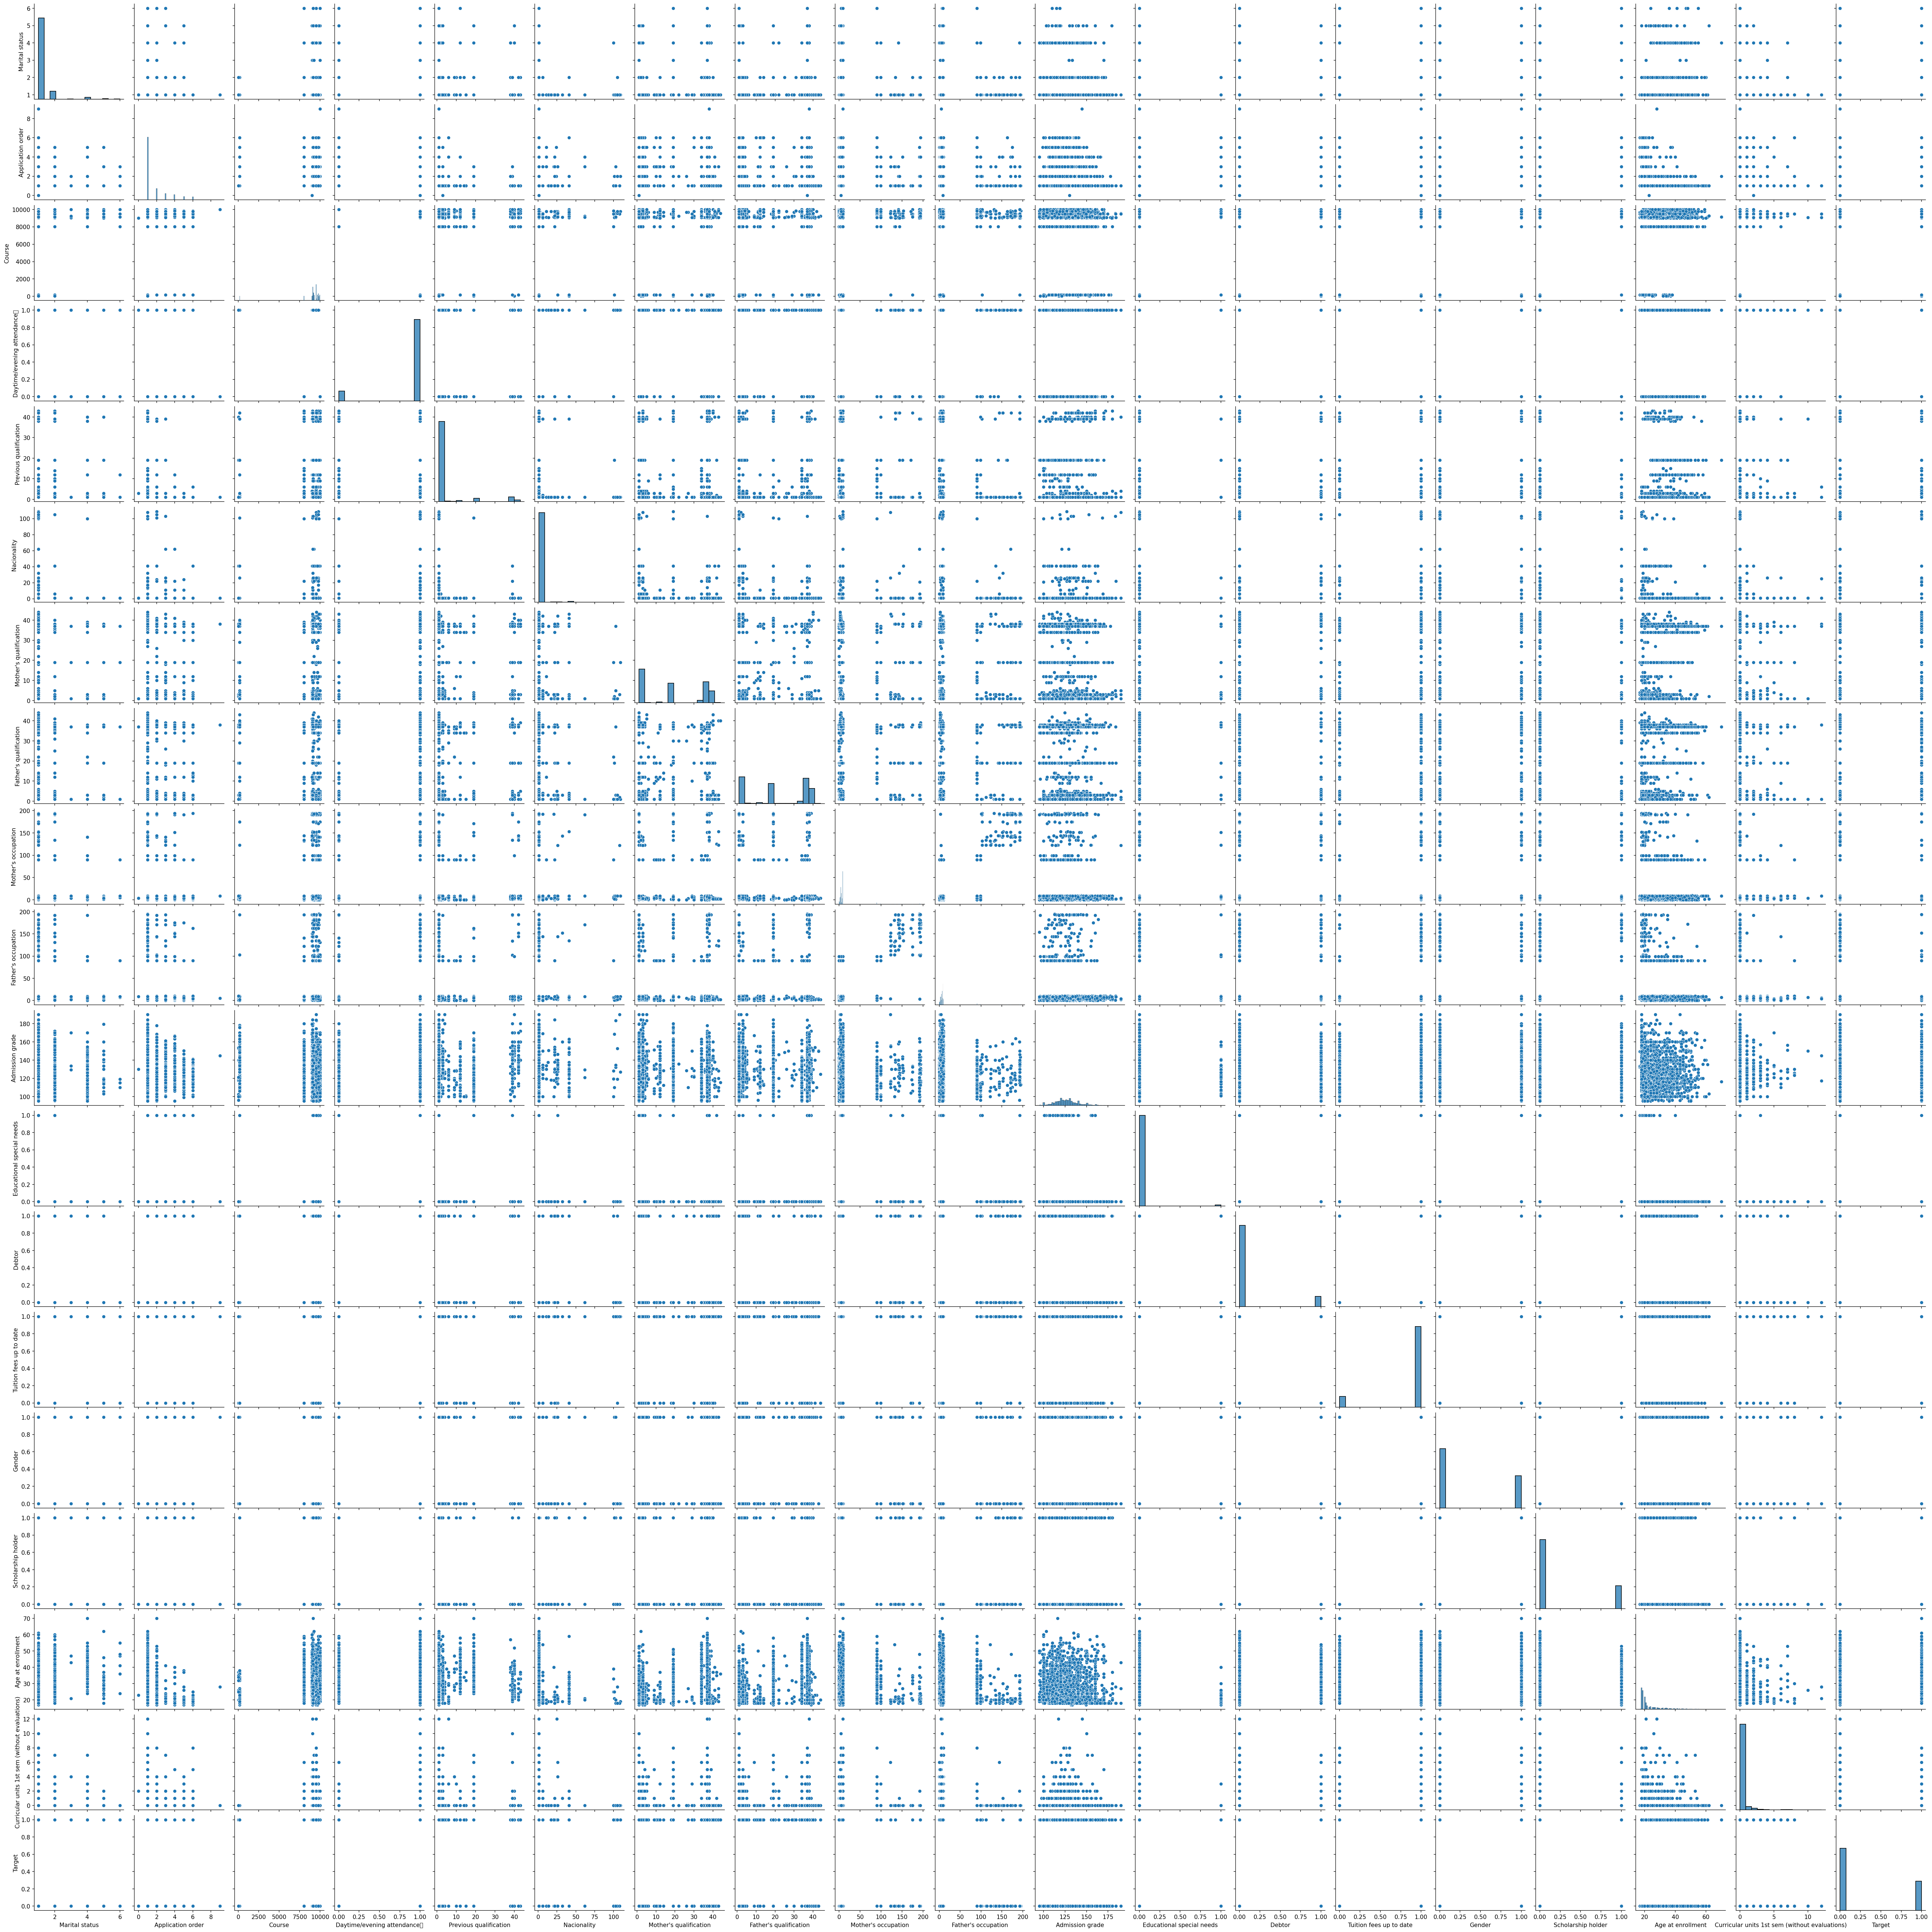

In [ ]:
sns.pairplot(ds_clean)

### K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

For the explanation of the **PCA** please check the beginning of the document

In [ ]:
pca = PCA(2)
ds_clust = pd.DataFrame(ds_clean.iloc[:, :-1])
ds_clust = ds_clust[['Marital status', 'Application order',
                     #'Course',
                    'Daytime/evening attendance\t',
                    #'Previous qualification',
                    #'Nacionality',
                    #'Mother's qualification', 'Father's qualification',
                    #'Mother's occupation', 'Father's occupation',
                    'Admission grade',
                    'Educational special needs', 'Debtor', 'Tuition fees up to date',
                    'Gender', 'Scholarship holder', 'Age at enrollment',
                    'Curricular units 1st sem (without evaluations)']]
# Then we have to nomralize or scale the data, since there are many differences according to the value of the variables
# normalization is done through: (x-mean)/std
std_scaler = StandardScaler()
ds_clust = pd.DataFrame(std_scaler.fit_transform(ds_clust))

ds_tr = pca.fit_transform(ds_clust)

*   **Silhouette:** we use the silhouette method to find the optimal number of clusters
*   **k-means:** the resulting number of clusters was then used for k-means

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

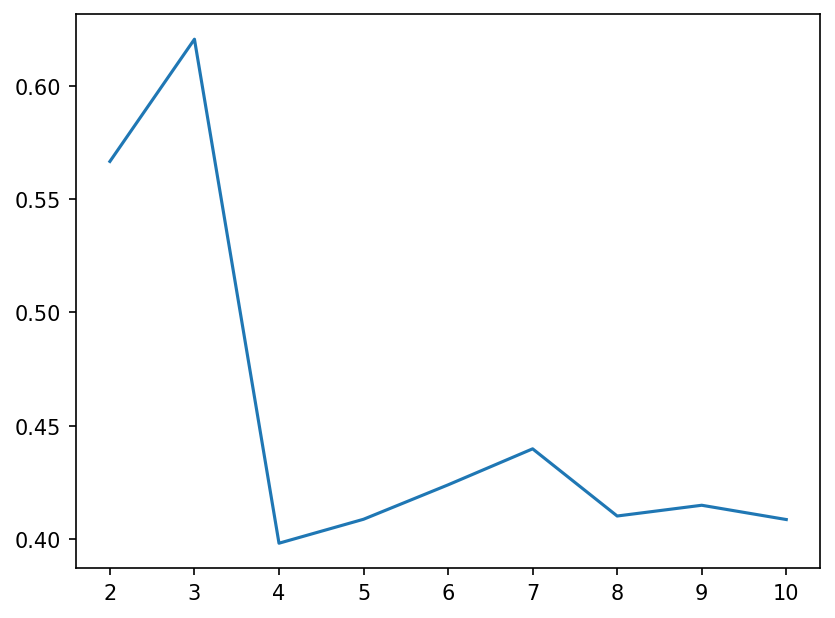

In [ ]:
sil = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k).fit(ds_tr)
  lbl_gruppo = kmeans.predict(ds_tr)
  sil.append(silhouette_score(ds_tr, lbl_gruppo, metric = 'euclidean'))
plt.plot(list(range(2, 11)), sil)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


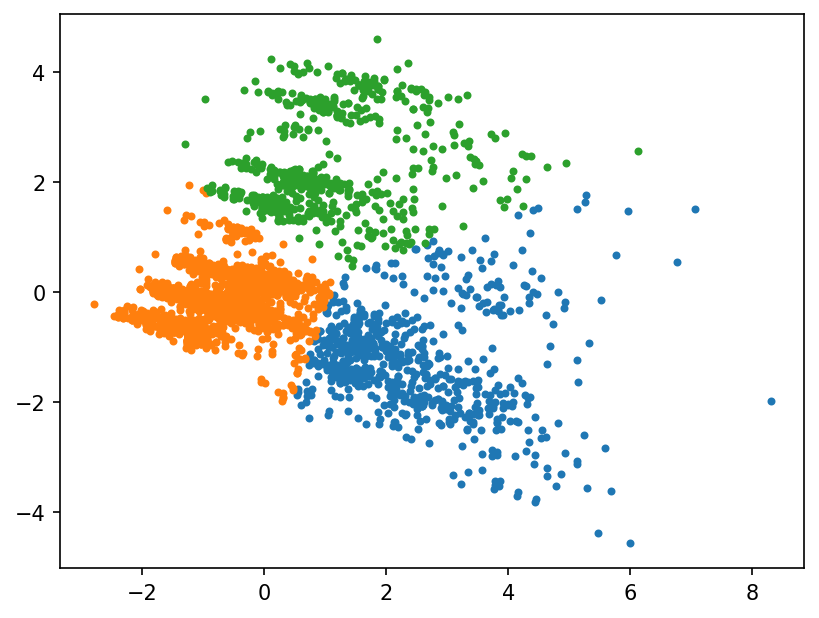

In [ ]:
km = KMeans(n_clusters=3)
modello = km.fit(ds_tr)
lbl_gruppo = modello.predict(ds_tr)

gruppi = np.unique(lbl_gruppo)

for i in gruppi:
    plt.scatter(ds_tr[lbl_gruppo == i , 0] , ds_tr[lbl_gruppo == i , 1], s=8)


As we can see, the clusters found with the k-means are not easy to interpret, however, for the purpose of our analysis (that is meant to create a predictive model based on the data), the results are not relevant

### Hierarchical clustering: Wald

In [ ]:
ds_clust = pd.DataFrame(ds_clean.iloc[:, :-1])

In [ ]:
#First of all we had to remove all the categorical variables, leaving only numerical variables
ds_clust = ds_clust[['Marital status', 'Application order',
                     #'Course',
                    'Daytime/evening attendance\t',
                    #'Previous qualification',
                    #'Nacionality',
                    #'Mother's qualification', 'Father's qualification',
                    #'Mother's occupation', 'Father's occupation',
                    'Admission grade',
                    'Educational special needs', 'Debtor', 'Tuition fees up to date',
                    'Gender', 'Scholarship holder', 'Age at enrollment',
                    'Curricular units 1st sem (without evaluations)']]

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Then we have to nomralize or scale the data, since there are many differences according to the value of the variables
# normalization is done through: (x-mean)/std
std_scaler = StandardScaler()
ds_clust = pd.DataFrame(std_scaler.fit_transform(ds_clust))

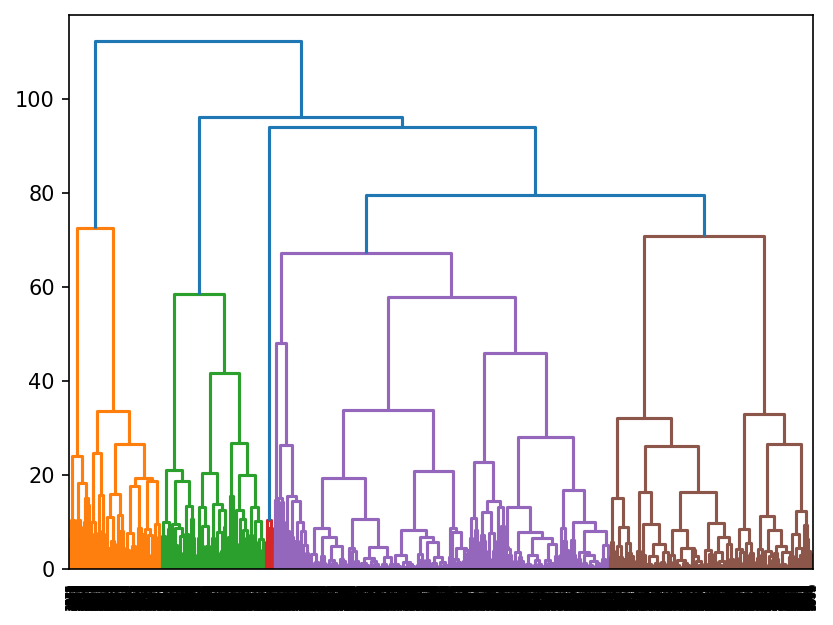

In [ ]:
distanze = pdist(ds_clust)
h_clust = linkage(distanze, method='ward')
ris_dendro = dendrogram(h_clust)
plt.show()

The Wald clustering method identified 5 possible clusters, now we want to check if different hierarchical clustering methods provide better results

### Other hierarchical clusters to have a comparison with the Wald

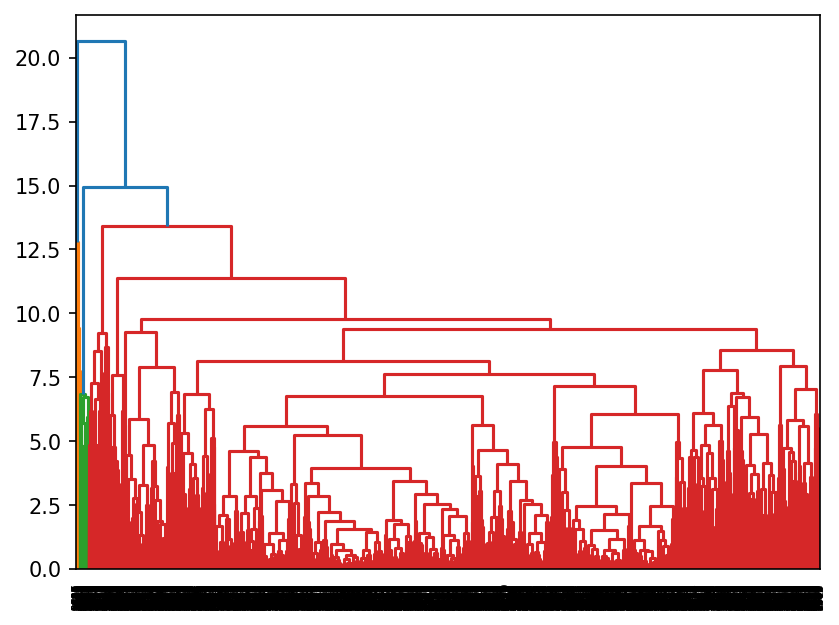

In [ ]:
#complete method
distanze = pdist(ds_clust)
h_clust = linkage(distanze, method='complete')
ris_dendro = dendrogram(h_clust)
plt.show()

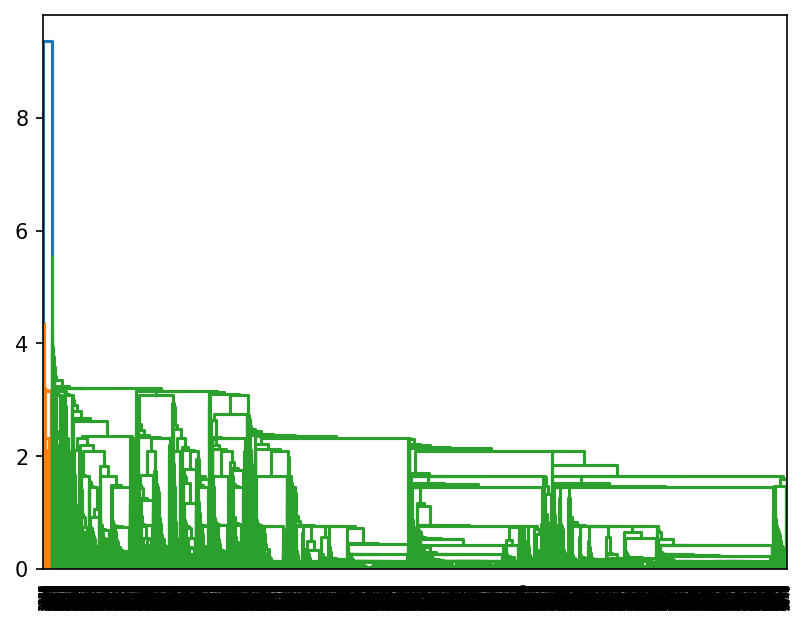

In [ ]:
#single method
distanze = pdist(ds_clust)
h_clust = linkage(distanze, method='single')
ris_dendro = dendrogram(h_clust)
plt.show()

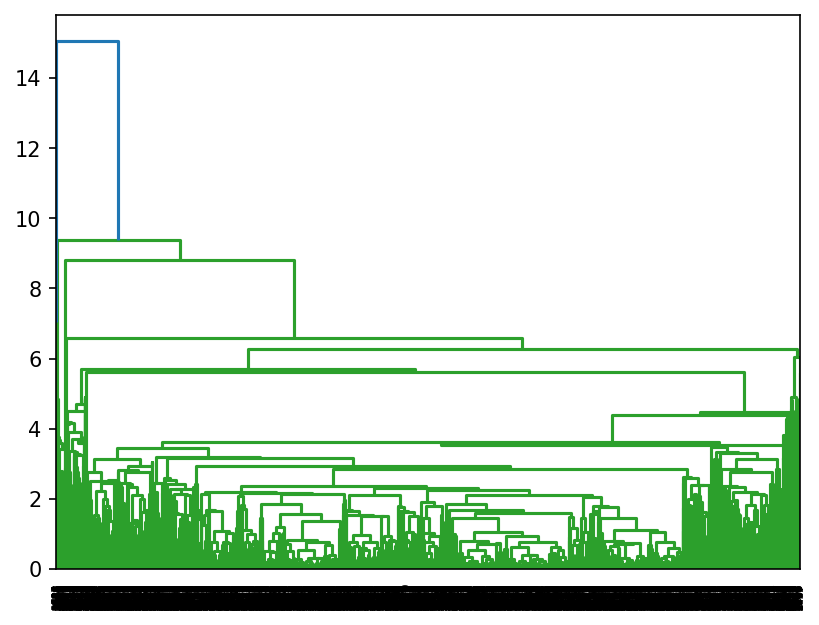

In [ ]:
#Centroid method
distanze = pdist(ds_clust)
h_clust = linkage(distanze, method='centroid')
ris_dendro = dendrogram(h_clust)
plt.show()

As a result, the Wald method seems more accurate in the identification of the clusters

### Advanced Analysis

**LDA: Linear Discriminant Analysis**
<br/> Now we want to use the data to create a model capable of predicting whether a student makes the dropout or not based on available data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from statistics import mean
import pandas as pd
import numpy as np

Explanation of the following three blocks of code:
* create x and y
* making the LDA
* validation through the stratified k-fold from which we also found the accuracy

In [ ]:
## X matrix contains all the variables except the last one "Target"
## y variable is the last column, so "target"
X = ds_clean.iloc[:,:-1]
y = ds_clean.iloc[:,-1]

In [ ]:
lda = LinearDiscriminantAnalysis()
modello = lda.fit(X, y)

In [ ]:
# Now the model is trained on 4 subsets (n_split-1) of the original dataset for 10 times
# And then is testd on the remaining subset
#Score is the accuracy and is the mean of all the scores achieved during the training
cv = RepeatedStratifiedKFold(n_repeats=10, n_splits=5)
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv) #, n_jobs=-1
print(f"Score: {mean(scores)}")

Score: 0.767677096914385


To validate the model, we manually implemented the stratified k-fold, hence manual validation, to realise which we used the **Confusion Matrix** which we then decided not to represent as, being inside a for loop, it would have been re-presented too many times, making the code much heavier.
<br/>**N.B.**
* **Accuracy:** percentage of units correctly predicted
* **Specificity:** number of dropout units correctly predicted by the model compared to the total number of dropout units
* **Sensitivity:** number of units that did not dropout correctly predicted by the model compared to the total number of units that did not dropout

We then trained the model 100 times in order to validate it on 100 different train and test sample combinations using the stratified k-fold. The results are all very similar to each other, as we can see from the **std** so we can say that the model is good and is better at detecting 1s than 0s (sensitivity much higher than specificity). This is because the threshold value of the LDA is automatically set to improve accuracy, regardless of any sensitivity and specificity results.<br/>

In [ ]:
n_run = 100
ds_stats = pd.DataFrame()

for i in range(1, n_run+1):
    train, test = train_test_split(ds_clean, test_size=0.2)
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    X = train.iloc[:,:-1]
    y = train.iloc[:,-1]
    lda = LinearDiscriminantAnalysis()
    modello = lda.fit(X, y)

    yhat = modello.predict(test.iloc[:,:-1])
    y = test.iloc[:,-1]

    cm = confusion_matrix(y, yhat)
    totale=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/totale
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])

    ds_stats[f"run{i}"] = [accuracy, sensitivity, specificity]
    ds_stats.index = ["accuracy", "sensitivity", "specificity"]

ds_stats["Media"] = ds_stats.mean(axis=1)
ds_stats["Std"] = ds_stats.std(axis=1)
ds_stats.head()

,run1,run2,run3,run4,run5,run6,run7,run8,run9,run10,...,run93,run94,run95,run96,run97,run98,run99,run100,Media,Std
accuracy,0.766102,0.764972,0.783051,0.746893,0.763842,0.753672,0.771751,0.761582,0.755932,0.762712,...,0.764972,0.757062,0.767232,0.760452,0.779661,0.759322,0.774011,0.757062,0.766542,0.012501
sensitivity,0.941860,0.940577,0.955810,0.949324,0.936134,0.947279,0.964225,0.942664,0.944732,0.928222,...,0.946399,0.951342,0.941080,0.953333,0.942308,0.936242,0.956376,0.935644,0.947968,0.009555
specificity,0.392226,0.415541,0.397810,0.337884,0.410345,0.370370,0.392617,0.393836,0.398693,0.389706,...,0.388889,0.356401,0.379562,0.354386,0.390805,0.394464,0.397924,0.369176,0.384571,0.026012


Before we entered the sensitivity and specificity values into the model, in order to make sure that the accuracy of the model was not only due to all 0 values or all 1 values, we decided to manually count the predicted classes of the variable "Target" in the following way.
<br/>**N.B.** Now this part of the code is no longer needed as we already have our sensitivity and specificity values performing the same function

In [ ]:
l_predicted = []
for i in range(ds_clean.shape[0]):
    l_predicted.append(modello.predict(pd.DataFrame(ds_clean.iloc[i:i+1, :-1], columns= ds_clean.columns[:-1])))
print(f"-------------------- Numeri del Modello --------------------\nN.1: {l_predicted.count(1)}\nN.0: {l_predicted.count(0)}")
print(f"-------------------- Valori osservati ---------------------\nN.1: {list(ds_clean.iloc[:,-1]).count(1)}\nN.0: {list(ds_clean.iloc[:,-1]).count(0)}")

-------------------- Numeri del Modello --------------------
N.1: 750
N.0: 3674
-------------------- Valori osservati ---------------------
N.1: 1421
N.0: 3003


### Results:

* The result of the k-mean is not very convincing, in the end we can state that clusters were not necessary for our analysis
* The LDA model can make predictions with good accuracy, although it is better suited to predicting sensitivity, thus the probability that a student will dropout rather than the other way around

## Conclusion

* New variables could be added to the dataset to improve the model.
* Another way is to train the model on the complete dataset, which for complexity issues was not possible
* Another possibility is to transform all the categorical variables into dummies variables on which to then perform logistic regression, which in our case, again for reasons related to the heaviness of the model, was not possible
* For futher details on the results, please, check the section in which the topics were discussed

## Bibliography

*   You Tube channel: George Stammel
*   Applied data mining for business and industry, 2nd edition, Paolo Giudici, Silvia Figini, Wiley
*   Course materials
*   https://www.sjsu.edu/faculty/guangliang.chen/Math253S20/lec11lda.pdf : LDA
*   https://www.sjsu.edu/faculty/guangliang.chen/Math253S20/lec8pca.pdf : PCA
*   https://seaborn.pydata.org/ : seaborn
*   https://scikit-learn.org/stable/ : sklearn
*   https://numpy.org/ : numpy
*   https://matplotlib.org/ : matplot
*   https://pandas.pydata.org/ :pandas